##  Description of the challenge:

The Tunisian Company of Electricity and Gas (STEG) is a public and a non-administrative company, it is responsible for delivering electricity and gas across Tunisia. The company suffered tremendous losses in the order of 200 million Tunisian Dinars due to fraudulent manipulations of meters by consumers.


##  Problem Statement:


**Using the client’s billing history, the aim of the challenge is to detect and recognize clients involved in fraudulent activities.**

##### The solution will enhance the company’s revenues and reduce the losses caused by such fraudulent activities.

About STEG (https://www.steg.com.tn/en/institutionnel/mission.html)


### Evaluation


The metric used for this challenge is Area Under the Curve (AUC).

<h1 style="font-size:4.5rem;color:blue;">EDA</h1>

## Libraries

In [1]:
import pandas as pd                             
import numpy as np                              
import seaborn as sns                                             
import matplotlib.pyplot as plt                 
import itertools                                
import datetime as dt                          
from scipy import stats                         


from IPython.display import display             
import os                                       
import gc  



import warnings                                  
warnings.filterwarnings('ignore') 

## Datasets

In [2]:
# Train dataset
client_train = pd.read_csv('client_train.csv',  parse_dates=['creation_date'])
invoice_train = pd.read_csv('invoice_train.csv' , parse_dates=['invoice_date'])

#Test dataset
client_test = pd.read_csv('client_test.csv', parse_dates=['creation_date'])
invoice_test = pd.read_csv('invoice_test.csv', parse_dates=['invoice_date'])

# Submission file
sample_submission = pd.read_csv('SampleSubmission.csv')

In [3]:
print(f"Missing Values in client_train is , {client_train.isna().any().sum()}")
print(f"Missing Values in invoice_train is , {invoice_train.isna().any().sum()}")
print(f"Missing Values in client_test is , {client_test.isna().any().sum()}")
print(f"Missing Values in invoice_test is , {invoice_test.isna().any().sum()}")

Missing Values in client_train is , 0
Missing Values in invoice_train is , 0
Missing Values in client_test is , 0
Missing Values in invoice_test is , 0


In [4]:
display("CLIENT TRAIN DATASET")
display(client_train.shape)
display(client_train.head(3))
display(" ")
display(" ")
display("INVOICE TRAIN DATASET")
display(invoice_train.shape)
display(invoice_train.head(3))
display(" ")
display(" ")
display("CLIENT TEST DATASET")
display(client_test.shape)
display(client_test.head(3))
display(" ")
display(" ")
display("INVOICE TEST DATASET")
display(invoice_test.shape)
display(invoice_test.head(3))
display(" ")
display(" ")
display("SAMPLE SUBMISSION DATASET")
display(sample_submission.shape)
display(sample_submission.head(3))

'CLIENT TRAIN DATASET'

(135493, 6)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,1994-12-31,0.0
1,69,train_Client_1,11,107,2002-05-29,0.0
2,62,train_Client_10,11,301,1986-03-13,0.0


' '

' '

'INVOICE TRAIN DATASET'

(4476749, 16)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC


' '

' '

'CLIENT TEST DATASET'

(58069, 5)

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,2002-05-28
1,69,test_Client_1,11,103,2009-06-08
2,62,test_Client_10,11,310,2004-07-04


' '

' '

'INVOICE TEST DATASET'

(1939730, 16)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC


' '

' '

'SAMPLE SUBMISSION DATASET'

(58069, 2)

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359


In [5]:
# Getting info about the datasets

In [6]:
display("CLIENT TRAIN DATASET")
display(client_train.info())
display(client_train.describe())
display(" ")
display(" ")
display("INVOICE TRAIN DATASET")
display(invoice_train.info())
display(invoice_train.describe())
display(" ")
display(" ")
display("CLIENT TEST DATASET")
display(client_test.info())
display(client_test.describe())
display(" ")
display(" ")
display("INVOICE TEST DATASET")
display(invoice_test.info())
display(invoice_test.describe())
display(" ")
display(" ")
display("SAMPLE SUBMISSION DATASET")
display(sample_submission.info())
display(sample_submission.describe())

'CLIENT TRAIN DATASET'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   disrict        135493 non-null  int64         
 1   client_id      135493 non-null  object        
 2   client_catg    135493 non-null  int64         
 3   region         135493 non-null  int64         
 4   creation_date  135493 non-null  datetime64[ns]
 5   target         135493 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.2+ MB


None

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


' '

' '

'INVOICE TRAIN DATASET'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   client_id             object        
 1   invoice_date          datetime64[ns]
 2   tarif_type            int64         
 3   counter_number        int64         
 4   counter_statue        object        
 5   counter_code          int64         
 6   reading_remarque      int64         
 7   counter_coefficient   int64         
 8   consommation_level_1  int64         
 9   consommation_level_2  int64         
 10  consommation_level_3  int64         
 11  consommation_level_4  int64         
 12  old_index             int64         
 13  new_index             int64         
 14  months_number         int64         
 15  counter_type          object        
dtypes: datetime64[ns](1), int64(12), object(3)
memory usage: 546.5+ MB


None

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


' '

' '

'CLIENT TEST DATASET'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58069 entries, 0 to 58068
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   disrict        58069 non-null  int64         
 1   client_id      58069 non-null  object        
 2   client_catg    58069 non-null  int64         
 3   region         58069 non-null  int64         
 4   creation_date  58069 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.2+ MB


None

,disrict,client_catg,region
count,58069.000000,58069.000000,58069.000000
mean,63.510617,11.507224,206.018461
std,3.356708,4.395923,104.144028
min,60.000000,11.000000,101.000000
25%,62.000000,11.000000,103.000000
50%,62.000000,11.000000,107.000000
75%,69.000000,11.000000,307.000000
max,69.000000,51.000000,399.000000


' '

' '

'INVOICE TEST DATASET'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939730 entries, 0 to 1939729
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   client_id             object        
 1   invoice_date          datetime64[ns]
 2   tarif_type            int64         
 3   counter_number        int64         
 4   counter_statue        int64         
 5   counter_code          int64         
 6   reading_remarque      int64         
 7   counter_coefficient   int64         
 8   consommation_level_1  int64         
 9   consommation_level_2  int64         
 10  consommation_level_3  int64         
 11  consommation_level_4  int64         
 12  old_index             int64         
 13  new_index             int64         
 14  months_number         int64         
 15  counter_type          object        
dtypes: datetime64[ns](1), int64(13), object(2)
memory usage: 236.8+ MB


None

,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06,1.939730e+06
mean,2.011711e+01,1.250499e+11,4.207647e-02,1.733742e+02,7.321898e+00,1.000460e+00,4.146279e+02,1.165942e+02,2.154889e+01,5.715360e+01,1.823083e+04,1.889133e+04,1.171288e+02
std,1.346528e+01,1.675264e+12,3.745849e-01,1.346030e+02,1.359839e+00,2.973967e-02,6.035931e+02,1.087467e+03,2.352451e+02,9.352610e+02,4.348538e+04,4.464089e+04,7.834548e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.209900e+05,0.000000e+00,5.000000e+00,6.000000e+00,1.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.814000e+03,2.083000e+03,4.000000e+00
50%,1.100000e+01,4.943000e+05,0.000000e+00,2.030000e+02,8.000000e+00,1.000000e+00,2.770000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.819000e+03,8.326000e+03,4.000000e+00
75%,4.000000e+01,1.104817e+06,0.000000e+00,2.070000e+02,9.000000e+00,1.000000e+00,6.030000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.212000e+04,2.281400e+04,4.000000e+00
max,4.500000e+01,2.787340e+13,5.000000e+00,6.000000e+02,9.000000e+00,2.100000e+01,1.108580e+05,3.090390e+05,7.167000e+04,3.009340e+05,3.039577e+06,3.066673e+06,9.906880e+05


' '

' '

'SAMPLE SUBMISSION DATASET'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58069 entries, 0 to 58068
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  58069 non-null  object 
 1   target     58069 non-null  float64
dtypes: float64(1), object(1)
memory usage: 907.5+ KB


None

,target
count,58069.000000
mean,0.501326
std,0.289530
min,0.000024
25%,0.250073
50%,0.501540
75%,0.754261
max,0.999987


In [7]:
sample_submission

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046
...,...,...
58064,test_Client_9995,0.882548
58065,test_Client_9996,0.715918
58066,test_Client_9997,0.285178
58067,test_Client_9998,0.154661


In [8]:
sample_submission.target.nunique()

58069

<h1 style="font-size:4rem;color:blue;">Data Preprocessing</h1>

In [9]:
# concatenate the datasets

In [10]:
client = pd.concat([client_train, client_test])
invoices = pd.concat([invoice_train, invoice_test])

In [11]:
print(client.shape)
client.head(2)

(193562, 6)


,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,1994-12-31,0.0
1,69,train_Client_1,11,107,2002-05-29,0.0


In [12]:
print(invoices.shape)
invoices.head(2)

(6416479, 16)


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC


In [13]:
client.isna().sum()

disrict              0
client_id            0
client_catg          0
region               0
creation_date        0
target           58069
dtype: int64

In [14]:
invoices.isna().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [15]:
invoices.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [16]:
invoices.counter_type.value_counts()

ELEC    4415200
GAZ     2001279
Name: counter_type, dtype: int64

In [17]:
for col in invoices.columns:
    print(f"{col} : {invoices[col].nunique()}")

client_id : 193562
invoice_date : 8697
tarif_type : 17
counter_number : 276455
counter_statue : 16
counter_code : 42
reading_remarque : 8
counter_coefficient : 17
consommation_level_1 : 9516
consommation_level_2 : 14564
consommation_level_3 : 2597
consommation_level_4 : 14114
old_index : 180326
new_index : 183299
months_number : 2226
counter_type : 2


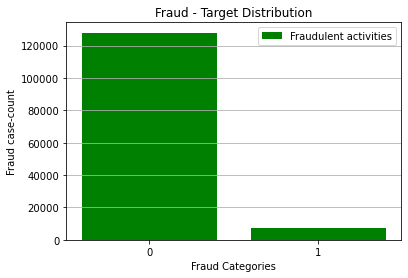

In [18]:
#Visualize fraudulent activities
fraudactivities = client_train.groupby(['target'])['client_id'].count()
plt.bar(x=fraudactivities.index, height=fraudactivities.values,
        tick_label = [0,1], label="Fraudulent activities",
       color='green')
plt.title('Fraud - Target Distribution')
plt.xlabel('Fraud Categories')
plt.ylabel('Fraud case-count')
plt.legend()
plt.grid(axis='y')
plt.show()

In [19]:
print(f"max : {invoices['invoice_date'].max()}  min : {invoices['invoice_date'].min()}")  

max : 2019-12-07 00:00:00  min : 1977-06-09 00:00:00


In [20]:
invoices['year'] = invoices["invoice_date"].dt.year
invoices['month'] = invoices["invoice_date"].dt.month

In [21]:
invoices.head(3)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC,2014,3
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC,2013,3
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC,2015,3


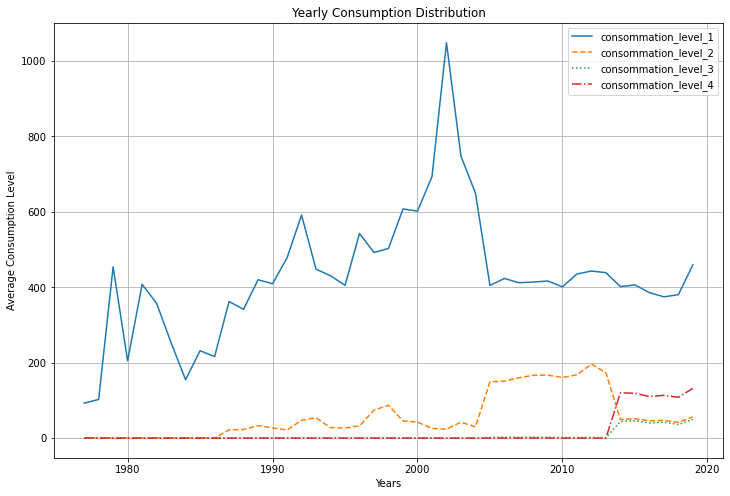

In [22]:
# info extraction
year_group = invoices.groupby('year')[['consommation_level_1','consommation_level_2','consommation_level_3','consommation_level_4']].mean().reset_index()

# Visualization
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(year_group['year'], year_group['consommation_level_1'], label='consommation_level_1', linestyle='-')
ax.plot(year_group['year'], year_group['consommation_level_2'], label='consommation_level_2', linestyle='--')
ax.plot(year_group['year'], year_group['consommation_level_3'], label='consommation_level_3', linestyle=':')
ax.plot(year_group['year'], year_group['consommation_level_4'], label='consommation_level_4', linestyle='-.')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Average Consumption Level")
plt.grid()
plt.title("Yearly Consumption Distribution")
plt.show()

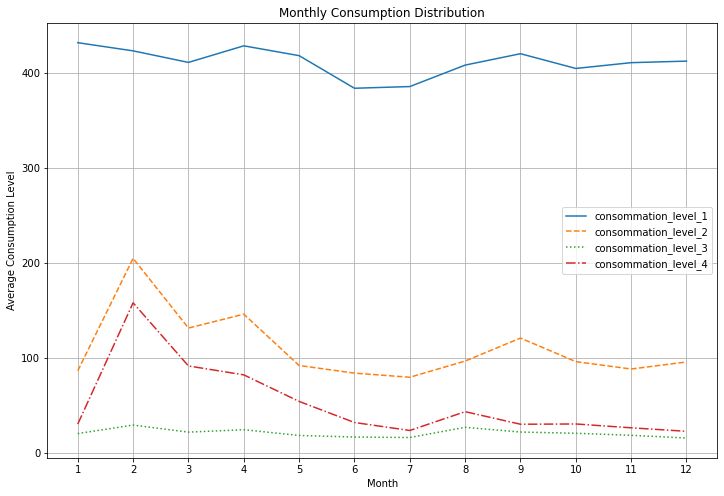

In [23]:
# info extraction
year_group = invoices.groupby('month')[['consommation_level_1','consommation_level_2','consommation_level_3','consommation_level_4']].mean().reset_index()

# Visualization
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(year_group['month'], year_group['consommation_level_1'], label='consommation_level_1', linestyle='-')
ax.plot(year_group['month'], year_group['consommation_level_2'], label='consommation_level_2', linestyle='--')
ax.plot(year_group['month'], year_group['consommation_level_3'], label='consommation_level_3', linestyle=':')
ax.plot(year_group['month'], year_group['consommation_level_4'], label='consommation_level_4', linestyle='-.')
plt.legend()
plt.xlabel("Month")
plt.ylabel("Average Consumption Level")
plt.grid()
plt.xticks(np.arange(1,13, step=1))
plt.title("Monthly Consumption Distribution")
plt.show()

In [24]:
invoices.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC,2014,3
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC,2013,3
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC,2015,3
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC,2015,7
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC,2016,11


<h1 style="font-size:4rem;color:blue;">Feature Engineering</h1>

In [25]:
#encode labels in categorical column
col={"ELEC":0,"GAZ":1}
invoices['counter_type']=invoices['counter_type'].map(col)

Using dataframefunction.loc[] we can manipulate values in rows 

In [26]:
# replacing srtrings values with numerical entries

#invoices.loc[ invoices['counter_statue'] == 'A', 'counter_statue'] = 0

In [27]:
features = invoices.drop(labels = ["client_id","invoice_date"], axis=1).columns

In [28]:
invoices['counter_statue'] = invoices['counter_statue'].replace({'A':0, '0':0})

In [29]:
features

Index(['tarif_type', 'counter_number', 'counter_statue', 'counter_code',
       'reading_remarque', 'counter_coefficient', 'consommation_level_1',
       'consommation_level_2', 'consommation_level_3', 'consommation_level_4',
       'old_index', 'new_index', 'months_number', 'counter_type', 'year',
       'month'],
      dtype='object')

In [30]:
for k in features:
    invoices[k].astype(int)

In [31]:
invoices_group = invoices.groupby('client_id').mean()

In [32]:
invoices_group

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month
client_id,,,,,,,,,,,,,,,
test_Client_0,11.000000,6.512080e+05,203.000000,6.810811,1.0,488.135135,3.243243,0.000000,0.000000,11389.837838,11881.216216,4.378378,0.000000,2011.648649,6.837838
test_Client_1,11.000000,1.747600e+05,433.000000,7.636364,1.0,1091.409091,843.136364,182.318182,586.318182,29380.772727,32083.954545,4.545455,0.000000,2014.136364,6.181818
test_Client_10,23.540541,3.468089e+06,119.648649,7.459459,1.0,554.040541,37.364865,15.743243,0.162162,11774.054054,12381.364865,4.000000,0.432432,2012.891892,7.986486
test_Client_100,25.500000,5.866505e+05,104.000000,6.575000,1.0,244.350000,0.000000,0.000000,0.000000,13623.725000,13868.075000,3.900000,0.500000,2008.450000,5.700000
test_Client_1000,20.849057,1.614115e+06,135.754717,7.905660,1.0,568.188679,145.056604,33.679245,0.000000,13927.471698,14676.584906,4.528302,0.339623,2012.622642,7.320755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_Client_99995,24.887324,5.423355e+05,110.267606,6.000000,1.0,1.957746,0.000000,0.000000,0.000000,7.295775,7.295775,4.225352,0.478873,2012.563380,6.042254
train_Client_99996,25.853659,1.837554e+06,103.536585,8.487805,1.0,185.853659,0.756098,0.000000,0.000000,1216.780488,1403.390244,3.902439,0.512195,2015.829268,6.048780
train_Client_99997,22.277778,1.602303e+05,128.444444,9.000000,1.0,273.083333,0.000000,0.000000,0.000000,2533.388889,2806.472222,4.111111,0.388889,2014.694444,6.888889


In [33]:
df_train_invoices = invoices.iloc[0:invoice_train.shape[0]]

In [34]:
df_train_invoices.head(3)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year,month
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,0,2014,3
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,0,2013,3
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,0,2015,3


In [35]:
#merging the tran dataset

df_train_invoices_group = df_train_invoices.groupby('client_id').mean()
df_train_invoices_merge = pd.merge(df_train_invoices_group, client_train, on = 'client_id')
#df_train_invoices_group.head(2)

### Saving train dataset

In [36]:
df_train_invoices_merge.drop('creation_date', axis=1)
df_train_invoices_merge.to_csv('train_dataset.csv', index=False)

####  correlation factor

In [37]:
correlation = df_train_invoices_merge.corr()
correlation_target = correlation.sort_values('target')['target'].reset_index()

In [38]:
correlation_target

,index,target
0,counter_code,-0.028985
1,counter_number,-0.018917
2,month,-0.015813
3,counter_coefficient,-0.001820
4,months_number,0.000881
5,consommation_level_1,0.005861
6,consommation_level_2,0.009712
7,region,0.010940
8,reading_remarque,0.010962
9,consommation_level_4,0.015081


In [39]:
# setting a correlation threshold of 0

high_correlation_target = correlation_target[correlation_target['target'] > 0] 
high_features = high_correlation_target['index'].values
print(high_features)

['months_number' 'consommation_level_1' 'consommation_level_2' 'region'
 'reading_remarque' 'consommation_level_4' 'consommation_level_3' 'year'
 'new_index' 'old_index' 'disrict' 'counter_type' 'tarif_type'
 'client_catg' 'target']


In [40]:
df_train = df_train_invoices_merge[high_features]

In [41]:
#df_train.head(3)

In [42]:
# features to be used in test dataset

test_features  = df_train.drop('target', axis=1).columns

In [43]:
# extracting test dataset
df_test_invoices = invoices.iloc[invoice_train.shape[0]:]

# merging client and invoice datasets
df_test_invoices_group = df_test_invoices.groupby('client_id').mean()
df_test_invoices_merge = pd.merge(df_test_invoices_group, client_test, on = 'client_id')

# final test dataset
df_test = df_test_invoices_merge[test_features]

### Saving Test dataset

In [44]:
df_test_invoices_merge.drop('creation_date', axis=1)
df_test_invoices_merge.to_csv('test_dataset.csv', index=False)

In [45]:
df_test.shape

(58069, 14)

# MODELING

<h1 style="font-size:3.5rem;color:gray;">Train Test Split</h1>

In [46]:
import pandas as pd

df_train_fs = pd.read_csv('train_dataset.csv')
df_test_fs = pd.read_csv('test_dataset.csv')

In [47]:
X = df_train.drop('target', axis=1)
y = df_train['target']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, stratify=y ,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((108394, 14), (27099, 14), (108394,), (27099,))

In [49]:
# handling outliers
import scipy.stats as stats

X_train = np.abs(stats.zscore(X_train))
X_test = np.abs(stats.zscore(X_test))
df_test_fs = np.abs(stats.zscore(df_test))

In [50]:
# Normalization
from sklearn.preprocessing import MinMaxScaler,StandardScaler

standard_scaler = StandardScaler()
for k in X_train.columns:
    standard_scaler.fit_transform(X_train[[k]])
    
for k in X_test.columns:
    standard_scaler.fit_transform(X_test[[k]])


for k in df_test_fs.columns:
    standard_scaler.fit_transform(df_test[[k]])

In [51]:
%%time

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score



rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state=9)
pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


print(f"Recall: { round(recall_score(y_test, y_pred)*100, 2) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 2) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 2) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 2) }")

Recall: 32.25
Precision: 8.52
F1-Score: 13.4732
Accuracy score: 76.87
AUC Score: 55.88
CPU times: total: 1min 46s
Wall time: 1min 49s


### RandomClassifier

In [52]:
%%time
rf = RandomForestClassifier()
model_rf = rf.fit(X_train, y_train)

CPU times: total: 37.8 s
Wall time: 38.2 s


In [53]:
accuracy_score(rf.predict(X_train), y_train)

0.9999169695739617

In [54]:
%%time
accuracy_score(rf.predict(X_test), y_test)

CPU times: total: 891 ms
Wall time: 1.01 s


0.9441307797335695

In [55]:
rf_pred = rf.predict(df_test_fs)
preds = pd.DataFrame(rf_pred, columns=['target'])
sub_client_id = df_test_invoices_merge['client_id']

submission = pd.DataFrame({
        'client_id': sub_client_id,
        'target': preds['target']})
submission.to_csv('rf_submission.csv', index=False)

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
model_logit = logit.fit(X_train, y_train)

In [57]:
accuracy_score(model_logit.predict(X_train), y_train)

0.9441020720704097

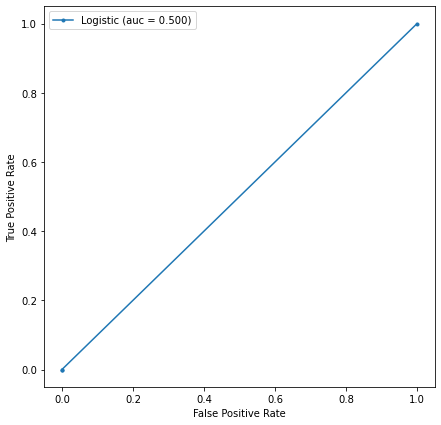

In [58]:
from sklearn.metrics import roc_curve, auc

logistic_test_pred = model_logit.predict(X_test)

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, logistic_test_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(7,7))
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [59]:
accuracy_score(model_logit.predict(X_test),y_test)

0.9441307797335695

In [60]:
logit_pred = model_logit.predict(df_test)
preds = pd.DataFrame(logit_pred, columns=['target'])
sub_client_id = df_test_invoices_merge['client_id']

submission = pd.DataFrame({
        'client_id': sub_client_id,
        'target': preds['target']})
submission.to_csv('logit_submission.csv', index=False)

### Decisison Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train, y_train)

In [62]:
accuracy_score(dtc_model.predict(X_train), y_train)

0.9999907743971068

In [63]:
accuracy_score(dtc_model.predict(X_test), y_test)

0.748440901878298

In [64]:
dtc_pred = dtc_model.predict(df_test_fs)
preds = pd.DataFrame(dtc_pred, columns=['target'])
sub_client_id = df_test_invoices_merge['client_id']

submission = pd.DataFrame({
        'client_id': sub_client_id,
        'target': preds['target']})
submission.to_csv('dtc_submission.csv', index=False)

### Gaussian Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
accuracy_score(gnb_model.predict(X_train), y_train)

0.4977028248796059

In [66]:
accuracy_score(gnb_model.predict(X_test), y_test)

0.6372559873058047

In [67]:
gnb_pred = gnb_model.predict(df_test_fs)
preds = pd.DataFrame(gnb_pred, columns=['target'])
sub_client_id = df_test_invoices_merge['client_id']

submission = pd.DataFrame({
        'client_id': sub_client_id,
        'target': preds['target']})
submission.to_csv('gnb_submission.csv', index=False)

### XGBoost Classifier

In [68]:
!pip install xgboost


In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train, y_train)
accuracy_score(xgb_model.predict(X_train), y_train)

0.9486687455025186

In [70]:
accuracy_score(xgb_model.predict(X_test), y_test)

0.939001439167497

In [71]:
xgb_pred = xgb_model.predict(df_test)
preds = pd.DataFrame(xgb_pred, columns=['target'])
sub_client_id = df_test_invoices_merge['client_id']

submission = pd.DataFrame({
        'client_id': sub_client_id,
        'target': preds['target']})
submission.to_csv('xgb_submission.csv', index=False)

### Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_model = gbc.fit(X_train, y_train)
accuracy_score(gbc_model.predict(X_train), y_train)

0.9442865841282728

In [73]:
accuracy_score(gbc_model.predict(X_test), y_test)

0.9430237278128344

In [74]:
gbc_pred = gbc_model.predict(df_test)
preds = pd.DataFrame(gbc_pred, columns=['target'])
sub_client_id = df_test_invoices_merge['client_id']

submission = pd.DataFrame({
        'client_id': sub_client_id,
        'target': preds['target']})
submission.to_csv('gbc_submission.csv', index=False)

### Lightgbm Classifier

In [75]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(boosting_type='gbdt', num_iterationss=500)
model.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: num_iterationss
[LightGBM] [Warning] Unknown parameter: num_iterationss
[LightGBM] [Info] Number of positive: 6053, number of negative: 102341
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2831
[LightGBM] [Info] Number of data points in the train set: 108394, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055843 -> initscore=-2.827756
[LightGBM] [Info] Start training from score -2.827756


LGBMClassifier(num_iterationss=500)

In [76]:
preds = model.predict(df_test)
preds = pd.DataFrame(preds, columns=['target'])
preds.head()

[LightGBM] [Warning] Unknown parameter: num_iterationss


,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [77]:
sub_client_id = df_test_invoices_merge['client_id']

submission = pd.DataFrame(
    {
        'client_id': sub_client_id,
        'target': preds['target']
    }
)

submission.head()

,client_id,target
0,test_Client_0,0.0
1,test_Client_1,0.0
2,test_Client_10,0.0
3,test_Client_100,0.0
4,test_Client_1000,0.0


In [78]:
submission.to_csv('lgb_submission1.csv', index=False)